In [1]:
%matplotlib inline

In [75]:
import matplotlib.pylab as plt
import numpy as np
from scipy.fftpack import rfft

In [161]:
from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter, crossings_nonzero_pos2neg

In [4]:
ts = GaitTimeSeries.load_data('../tests/data/cloudupdrs_gait.csv')
gp = GaitProcessor()

In [100]:
ts

,td,x,y,z,mag_sum_acc
1970-01-01 00:00:00.000000,0.000000,0.093432,0.694638,-0.299648,10.066663
1970-01-01 00:00:00.024536,0.024536,-0.056393,0.694638,-0.272407,9.916483
1970-01-01 00:00:00.042755,0.042755,-0.029152,0.653777,-0.272407,9.940876
1970-01-01 00:00:00.060761,0.060761,-0.029152,0.612916,-0.299648,9.939056
1970-01-01 00:00:00.078766,0.078766,-0.029152,0.612916,-0.231546,9.937236
1970-01-01 00:00:00.116150,0.116150,-0.029152,0.612916,-0.231546,9.937236
1970-01-01 00:00:00.135346,0.135346,-0.029152,0.572055,-0.272407,9.935836
1970-01-01 00:00:00.154053,0.154053,-0.029152,0.612916,-0.299648,9.939056
1970-01-01 00:00:00.192658,0.192658,-0.029152,0.612916,-0.299648,9.939056
1970-01-01 00:00:00.212067,0.212067,0.011709,0.612916,-0.272407,9.979040


In [6]:
strikes, strike_i = gp.heel_strikes(ts.x)

In [64]:
walking = ts[strike_i[0]: strike_i[-1]]
total_steps = len(walking)

steps = []

for z in range(len(strike_i) - 1):
    steps.append([ts.x[strike_i[z]: strike_i[z+1]]])

first_foot= [len(a[0]) for a in steps[::2]]
second_foot = [len(a[0])  for a in steps[1::2]]

first_sym = np.sum([a / total_steps for a in first_foot])
second_sym = np.sum([a / total_steps for a in second_foot])

np.sum(first_sym) + np.sum(second_sym)

1.0

In [67]:
f_gi = [a / gp.sampling_frequency for a in first_foot]
s_gi = [a / gp.sampling_frequency for a in second_foot]

In [72]:
np.mean([np.std(f_gi), np.std(s_gi)])

0.2026696444350172

In [78]:
the_fft = np.fft.fft(ts.x)

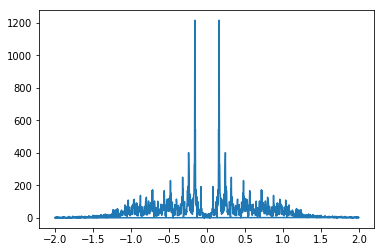

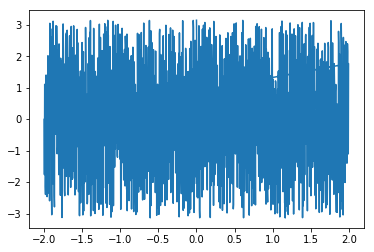

In [83]:
y = ts.x
Y    = np.fft.fft(y)
freq = np.fft.fftfreq(len(y), 0.25)

plt.figure()
plt.plot( freq, np.abs(Y) )
plt.figure()
plt.plot(freq, np.angle(Y) )
plt.show()

In [87]:
h, e = np.histogram(Y, 100)

/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/lib/function_base.py:786: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/home/c/lab/envs/pdkit/lib/python3.6/site-packages/numpy/lib/function_base.py:792: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)


In [99]:
np.sum(h[::2]) / np.sum(h[1::2])

2.0765027322404372

In [102]:
np.sqrt(np.mean(ts.mag_sum_acc))

3.2018112511728054

In [107]:
first_foot

[49, 51, 51, 32, 71, 99, 52]

In [115]:
first_strides = list(zip(first_foot[::2], first_foot[1::2]))
second_strides = list(zip(second_foot[::2], second_foot[1::2]))

first_str_duration = [np.sum(a) / gp.sampling_frequency for a in first_strides]
second_str_duration = [np.sum(a) / gp.sampling_frequency for a in second_strides]

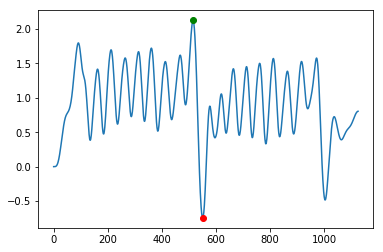

In [142]:
f_sig = butter_lowpass_filter(ts.y, 100, cutoff=2, order=5)

top = [np.argmax(f_sig), f_sig[np.argmax(f_sig)]]
bot = [np.argmin(f_sig), f_sig[np.argmin(f_sig)]]

plt.plot(f_sig)
plt.plot(top[0], top[1], 'go')
plt.plot(bot[0], bot[1], 'ro')

In [143]:
import scipy.signal as sig

In [196]:
def start_end_turn(signal, freq=100):
    
    f_sig = butter_lowpass_filter(signal, freq, cutoff=2, order=5)

    gt = sig.argrelextrema(f_sig, np.greater)[0]
    lt = sig.argrelextrema(f_sig, np.less)[0]

    end_turn = gt[np.argmax(f_sig[gt]) + 1]
    start_turn = lt[np.argmin(f_sig[lt]) - 1]

    plt.plot(f_sig)
    plt.plot(start_turn, f_sig[start_turn], 'go')
    plt.plot(end_turn, f_sig[end_turn], 'ro')
    
    return start_turn, end_turn

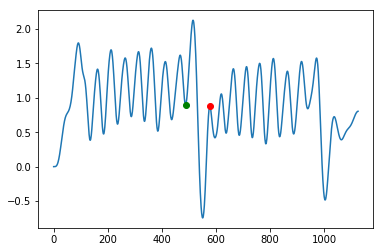

In [202]:
s_y, e_y = start_end_turn(ts.y)

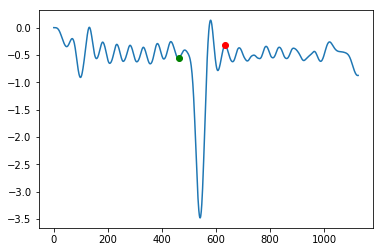

In [203]:
s_z, e_z = start_end_turn(ts.z)

(461, 488)

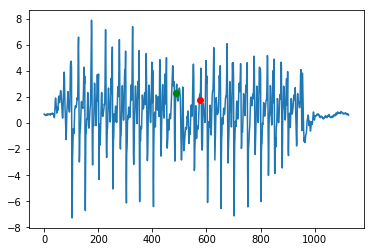

In [201]:
plt.plot(ts.y.values)
plt.plot(start_turn, ts.y[s], 'go')
plt.plot(end_turn, ts.y[e], 'ro')

In [189]:
ts.y[start_turn]

2.3018389